In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Access the Data
df = pd.read_csv("Titanic Dataset.csv")


In [9]:
# Step 2: Clean and Organize
df_cleaned = df.copy()

# Fill missing 'age' with median
df_cleaned['age'].fillna(df_cleaned['age'].median(), inplace=True)

# Fill missing 'embarked' with mode
df_cleaned['embarked'].fillna(df_cleaned['embarked'].mode()[0], inplace=True)

# Drop columns with too many missing values or not useful
df_cleaned.drop(columns=['cabin', 'boat', 'body', 'ticket', 'name', 'home.dest'], inplace=True)

# Drop rows with remaining missing values
df_cleaned.dropna(inplace=True)

In [10]:
# Step 3: Perform Exploratory Data Analysis
# Basic statistics
eda_summary = df_cleaned.describe()

# Survival rate by sex
survival_by_sex = df_cleaned.groupby('sex')['survived'].mean()

# Survival rate by class
survival_by_class = df_cleaned.groupby('pclass')['survived'].mean()

# Correlation matrix
correlation = df_cleaned.corr(numeric_only=True)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [29]:
df.describe

<bound method NDFrame.describe of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex    age  sibsp  parch  ticket      fare    cabin emba

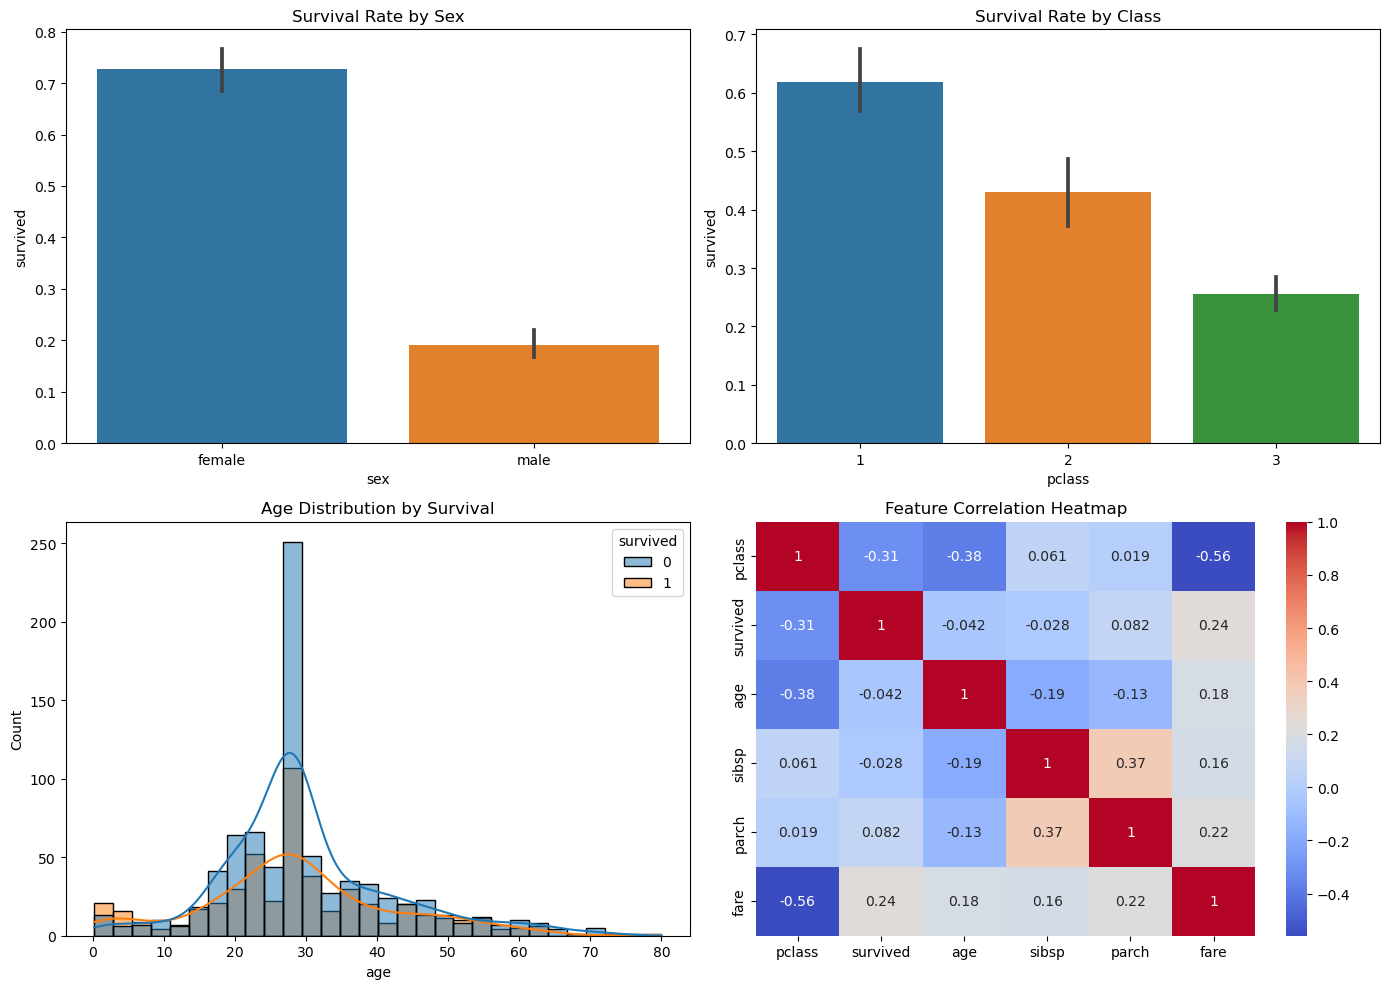

In [25]:

# Step 4: Visual Representation
plt.figure(figsize=(14, 10))

# Plot 1: Survival by Sex
plt.subplot(2, 2, 1)
sns.barplot(data=df_cleaned, x='sex', y='survived')
plt.title('Survival Rate by Sex')

# Plot 2: Survival by Class
plt.subplot(2, 2, 2)
sns.barplot(data=df_cleaned, x='pclass', y='survived')
plt.title('Survival Rate by Class')

# Plot 3: Age distribution by survival
plt.subplot(2, 2, 3)
sns.histplot(data=df_cleaned, x='age', hue='survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')

# Plot 4: Heatmap of correlations
plt.subplot(2, 2, 4)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

In [12]:
# Step 5: Conclusion of Analysis & Impact
print("===== ANALYSIS SUMMARY =====")
print("1. Women had a significantly higher survival rate than men.")
print("2. First-class passengers had the highest chance of survival.")
print("3. Younger passengers (especially children) had better survival rates.")
print("4. Strong correlations exist between survival and features like class and sex.")
print("This suggests that socioeconomic status and gender norms significantly impacted survival outcomes.")


===== ANALYSIS SUMMARY =====
1. Women had a significantly higher survival rate than men.
2. First-class passengers had the highest chance of survival.
3. Younger passengers (especially children) had better survival rates.
4. Strong correlations exist between survival and features like class and sex.
This suggests that socioeconomic status and gender norms significantly impacted survival outcomes.
